In [5]:
using WAV
using FFTW
using Plots
import DSP: unwrap

In [6]:
bird = wavread("bird.wav")[1][:,1]
birdfs = wavread("bird.wav")[2]

48000.0f0

In [38]:
function freqchanger(signal, shift)
    fft_m = fft(signal)
    mag = real(fft_m);
    phase = unwrap(angle.(fft_m)) #unwrap
    N = length(fft_m)
    mag1 = mag[2:Int(N/2)+1]                
    phase1 = phase[2:Int(N/2)+1] 
    mag2 = mag[Int(N/2)+2:end]
    phase2 = phase[Int(N/2)+2:end] 
    mag1s   = [zeros(shift); mag1[1:end-shift]]
    phase1s = [zeros(shift); phase1[1:end-shift]]
    mag2s   = [mag2[shift+1:end]; zeros(shift)]
    phase2s = [phase2[shift+1:end]; zeros(shift)]
    magS    = [mag[1]; mag1s; mag2s]
    phaseS  = [phase[1]; phase1s; phase2s]
    x = magS .* cos.(phaseS)
    y = magS .* sin.(phaseS)
    fft_new = x + im*y
    return fft_new
end
    
    

freqchanger (generic function with 1 method)

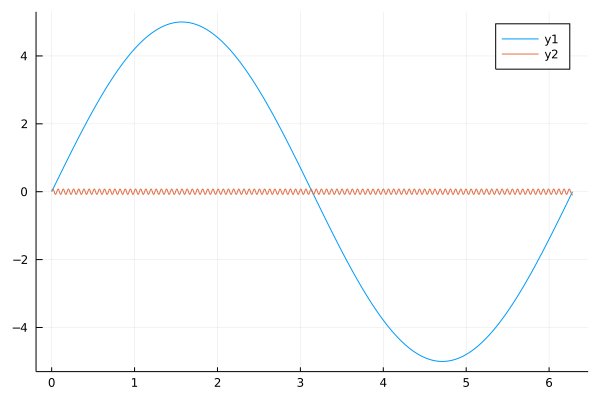

In [36]:
t = range(0, 2pi, length = 1000)
f = 5*sin.(t)
plot(t, f)
new_f = real(ifft(5*freqchanger(f, 100)))
plot!(t, new_f)

In [20]:
newbird = freqchanger(bird, 0);

In [19]:
plot(FFTW.fftfreq(length(bird), birdfs), real(fft(bird)))
plot!(FFTW.fftfreq(length(bird), birdfs), real(newbird))